In [1]:
# Multinomial Naive Bayes Customer Review Sentiment/Authenticity(Lie Detection) Analysis
# Sentiment (p= posistive, n= negative)
# Authenticity/Lie Detection (t= true, f= fake)

from random import random
import nltk
import pandas as pd
import sklearn
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import os
#Convert a collection of raw documents to a matrix of TF-IDF features.
#Equivalent to CountVectorizer but with tf-idf norm
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize


In [2]:
# check current path to see if it is correct
path = os.getcwd()
print(path)

c:\Users\mcfad\Documents\School\2023 Text Mining\Week 4


In [3]:
# will have data/corpus in separate folder
path = path + "\\" + "Data"
print(path)

# if incorrect path change it here
#path= ''

c:\Users\mcfad\Documents\School\2023 Text Mining\Week 4\Data


In [4]:
CompleteFilePaths = []

# check path directory and only include .csv (for this assignement)
for name in os.listdir(path):
    if re.search('\.csv', name):
        #print(name)
        nextfile = path +"\\" + name
        CompleteFilePaths.append(nextfile)
    else:
        print("File: " + name + " is not a csv type file so it was excluded")
        continue

In [5]:
# check to make sure paths and files are correct
print(CompleteFilePaths)

['c:\\Users\\mcfad\\Documents\\School\\2023 Text Mining\\Week 4\\Data\\deception_data_converted_final.csv']


In [6]:
AllReviewsList=[]   #content
All_lie_Labels = []
All_senti_Labels=[]    #labels

for file in CompleteFilePaths:
    with open(file,'r') as FILE:    # "a", "w"
        FILE.readline() # skip header line - skip row 1
        ## This reads the line and so does nothing with it
        for row in FILE:   #starts on row 2
            #print(row)
            #print(type(row))
            Next_lie_Label, Next_senti_Label,NextReview=row.split(",", 2)
            AllReviewsList.append(NextReview.lower())
            All_lie_Labels.append(Next_lie_Label)
            All_senti_Labels.append(Next_senti_Label)


In [7]:
# check values were split correctly
print(AllReviewsList[:3])
print(All_lie_Labels[:3])
print(All_senti_Labels[:3])


["'mike\\'s pizza high point, ny service was very slow and the quality was low. you would think they would know at least how to make good pizza, not. stick to pre-made dishes like stuffed pasta or a salad. you should consider dining else where.',,,,,,,,,,,,,,,,,,,\n", "'i really like this buffet restaurant in marshall street. they have a lot of selection of american, japanese, and chinese dishes. we also got a free drink and free refill. there are also different kinds of dessert. the staff is very friendly. it is also quite cheap compared with the other restaurant in syracuse area. i will definitely coming back here.',,,,,,,,,,,,,,,,,,,\n", "'after i went shopping with some of my friend, we went to dodo restaurant for dinner. i found worm in one of the dishes .',,,,,,,,,,,,,,,,,,,,\n"]
['f', 'f', 'f']
['n', 'n', 'n']


In [8]:
# create two new data sets with each list of labels being zipped to the reviews
LieData = list(zip(All_lie_Labels, AllReviewsList))
SentiData = list(zip(All_senti_Labels, AllReviewsList))

# check zip worked properly
print(LieData[:3])
print(SentiData[:3])

[('f', "'mike\\'s pizza high point, ny service was very slow and the quality was low. you would think they would know at least how to make good pizza, not. stick to pre-made dishes like stuffed pasta or a salad. you should consider dining else where.',,,,,,,,,,,,,,,,,,,\n"), ('f', "'i really like this buffet restaurant in marshall street. they have a lot of selection of american, japanese, and chinese dishes. we also got a free drink and free refill. there are also different kinds of dessert. the staff is very friendly. it is also quite cheap compared with the other restaurant in syracuse area. i will definitely coming back here.',,,,,,,,,,,,,,,,,,,\n"), ('f', "'after i went shopping with some of my friend, we went to dodo restaurant for dinner. i found worm in one of the dishes .',,,,,,,,,,,,,,,,,,,,\n")]
[('n', "'mike\\'s pizza high point, ny service was very slow and the quality was low. you would think they would know at least how to make good pizza, not. stick to pre-made dishes l

In [9]:
# create a vectorizers that can use the list from all of my files
My_CV1 = CountVectorizer(input='content', 
    stop_words='english',
    #max_features=100
    )

My_TF1 = TfidfVectorizer(input='content',
    stop_words='english',
    #max_features=100
    )

In [10]:
# Fit and transform vectorizers to data
X_CV1=My_CV1.fit_transform(AllReviewsList)
X_TF1=My_TF1.fit_transform(AllReviewsList)

In [11]:
# review vocabulary identified by each vectorizer
print(list(My_CV1.vocabulary_.items())[0:10])
print(list(My_TF1.vocabulary_.items())[0:10])

[('mike', 692), ('pizza', 802), ('high', 526), ('point', 814), ('ny', 732), ('service', 965), ('slow', 996), ('quality', 852), ('low', 655), ('think', 1112)]
[('mike', 692), ('pizza', 802), ('high', 526), ('point', 814), ('ny', 732), ('service', 965), ('slow', 996), ('quality', 852), ('low', 655), ('think', 1112)]


In [12]:
#extract words for column names
ColNames=My_TF1.get_feature_names_out()
print(ColNames[:10])

['10' '100' '15' '16' '20' '25' '2nd' '30' '50' '5pm']


In [13]:
# Document topic model A DTM (matrix of counts). Make sure to put vectorizers to array
DataFrame_CV=pd.DataFrame(X_CV1.toarray(), columns=ColNames)
DataFrame_TF=pd.DataFrame(X_TF1.toarray(), columns=ColNames)


In [14]:
for nextcol in DataFrame_CV.columns:
   if(re.search(r'[^A-Za-z]+', nextcol)):
        #print(nextcol)
        DataFrame_CV=DataFrame_CV.drop([nextcol], axis=1)
   elif(len(str(nextcol))<=3):
        #print(nextcol)
        DataFrame_CV=DataFrame_CV.drop([nextcol], axis=1)

print(DataFrame_CV.head())

   abruptly  absolutely  acceptable  accord  acknowledge  actual  actually  \
0         0           0           0       0            0       0         0   
1         0           0           0       0            0       0         0   
2         0           0           0       0            0       0         0   
3         0           0           0       0            0       0         0   
4         0           0           0       0            0       0         0   

   additional  adorable  affordable  ...  wreck  write  written  wrong  wrote  \
0           0         0           0  ...      0      0        0      0      0   
1           0         0           0  ...      0      0        0      0      0   
2           0         0           0  ...      0      0        0      0      0   
3           0         0           0  ...      0      0        0      0      0   
4           0         0           0  ...      0      0        0      0      0   

   yeah  yelp  yesterday  york  yuenan  
0  

In [15]:
for nextcol in DataFrame_TF.columns:
   if(re.search(r'[^A-Za-z]+', nextcol)):
        #print(nextcol)
        DataFrame_TF=DataFrame_TF.drop([nextcol], axis=1)
   elif(len(str(nextcol))<=3):
        #print(nextcol)
        DataFrame_TF=DataFrame_TF.drop([nextcol], axis=1)

print(DataFrame_TF.head())

   abruptly  absolutely  acceptable  accord  acknowledge  actual  actually  \
0       0.0         0.0         0.0     0.0          0.0     0.0       0.0   
1       0.0         0.0         0.0     0.0          0.0     0.0       0.0   
2       0.0         0.0         0.0     0.0          0.0     0.0       0.0   
3       0.0         0.0         0.0     0.0          0.0     0.0       0.0   
4       0.0         0.0         0.0     0.0          0.0     0.0       0.0   

   additional  adorable  affordable  ...  wreck  write  written  wrong  wrote  \
0         0.0       0.0         0.0  ...    0.0    0.0      0.0    0.0    0.0   
1         0.0       0.0         0.0  ...    0.0    0.0      0.0    0.0    0.0   
2         0.0       0.0         0.0  ...    0.0    0.0      0.0    0.0    0.0   
3         0.0       0.0         0.0  ...    0.0    0.0      0.0    0.0    0.0   
4         0.0       0.0         0.0  ...    0.0    0.0      0.0    0.0    0.0   

   yeah  yelp  yesterday  york  yuenan  
0  

In [16]:
# add count values by word
sumwords_cv = DataFrame_CV.sum(axis=0)
print(sumwords_cv)

abruptly       1
absolutely     1
acceptable     1
accord         1
acknowledge    1
              ..
yeah           2
yelp           3
yesterday      1
york           3
yuenan         1
Length: 1159, dtype: int64


In [17]:
# sort by count and then select the highest 20 values
sortedsumwords_cv = sumwords_cv.sort_values()
top20words_cv = sortedsumwords_cv[-20:]
print(top20words_cv)

dishes        14
plate         15
menu          15
salad         15
pizza         15
just          16
really        17
friends       18
like          22
minutes       23
experience    23
great         25
ordered       27
service       28
good          31
best          31
went          34
place         43
restaurant    76
food          80
dtype: int64


In [18]:
sumwords_tf = DataFrame_TF.sum(axis=0)
print(sumwords_tf)

abruptly       0.103995
absolutely     0.250587
acceptable     0.202492
accord         0.197446
acknowledge    0.162608
                 ...   
yeah           0.316744
yelp           0.405425
yesterday      0.152840
york           0.500765
yuenan         0.360875
Length: 1159, dtype: float64


In [19]:
sortedsumwords_tf = sumwords_tf.sort_values()
top20words_tf = sortedsumwords_tf[-20:]
print(top20words_tf)

menu          1.788096
nice          1.843264
just          1.894522
salad         1.918936
pizza         1.933348
really        2.001165
experience    2.021929
dishes        2.037063
friends       2.090132
minutes       2.190265
like          2.378267
ordered       2.379506
service       2.608532
best          2.900601
good          3.075118
great         3.086331
went          3.113254
place         3.679062
food          5.233637
restaurant    5.314125
dtype: float64


In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# make a dataframe with the top words
freqDF_cv = pd.DataFrame(top20words_cv)
freqDF_cv = freqDF_cv.reset_index().rename(columns={0: 'Freq','index': 'Labels'})
print(freqDF_cv)


        Labels  Freq
0       dishes    14
1        plate    15
2         menu    15
3        salad    15
4        pizza    15
5         just    16
6       really    17
7      friends    18
8         like    22
9      minutes    23
10  experience    23
11       great    25
12     ordered    27
13     service    28
14        good    31
15        best    31
16        went    34
17       place    43
18  restaurant    76
19        food    80


In [21]:
# create a dictionary for the wordcloud to use
d_cv = {}


for w, f in freqDF_cv.values:
    d_cv[w] = f

wordcld_cv = WordCloud()

wordcld_cv.generate_from_frequencies(d_cv)   


In [22]:

freqDF_tf = pd.DataFrame(top20words_tf)
freqDF_tf = freqDF_tf.reset_index().rename(columns={0: 'Freq','index': 'Labels'})
print(freqDF_tf)

        Labels      Freq
0         menu  1.788096
1         nice  1.843264
2         just  1.894522
3        salad  1.918936
4        pizza  1.933348
5       really  2.001165
6   experience  2.021929
7       dishes  2.037063
8      friends  2.090132
9      minutes  2.190265
10        like  2.378267
11     ordered  2.379506
12     service  2.608532
13        best  2.900601
14        good  3.075118
15       great  3.086331
16        went  3.113254
17       place  3.679062
18        food  5.233637
19  restaurant  5.314125


In [23]:

d_tf = {}

for w, f in freqDF_tf.values:
    d_tf[w] = f

wordcld_tf = WordCloud()

wordcld_tf.generate_from_frequencies(d_tf)

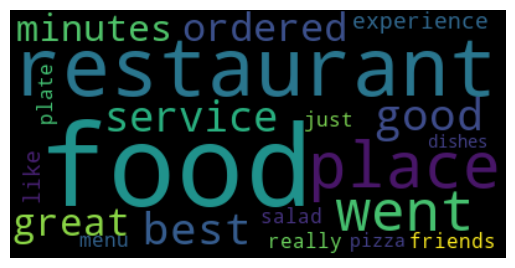

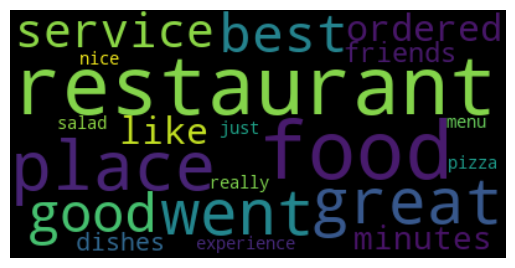

In [24]:
# plot word cloud
plt.imshow(wordcld_cv, interpolation='bilinear')
plt.axis('off')
plt.show()

plt.imshow(wordcld_tf, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import random
import numpy as np

#make a model for each iteration
MyLieModelNB_CV= MultinomialNB()
MySentiModelNB_CV = MultinomialNB()

MyLieModelNB_TF = MultinomialNB()
MySentiModelNB_TF = MultinomialNB()

In [26]:
## When you look up this model, you learn that it wants the 
## !!! DF separate from the labels  !
# split data,shuffle, and apply labels for each iteration
x_train_cv, x_test_cv, y_train_lie_cv, y_test_lie_cv = train_test_split(DataFrame_CV, All_lie_Labels, test_size=0.33, random_state=42)

x_train_cv, x_test_cv, y_train_senti_cv, y_test_senti_cv = train_test_split(DataFrame_CV, All_senti_Labels, test_size=0.33, random_state=42)

x_train_tf, x_test_tf, y_train_lie_tf, y_test_lie_tf = train_test_split(DataFrame_TF, All_lie_Labels, test_size=0.33, random_state=42)

x_train_tf, x_test_tf, y_train_senti_tf, y_test_senti_tf = train_test_split(DataFrame_TF, All_senti_Labels, test_size=0.33, random_state=42)


In [27]:
# now fit the relevant data to the model
MyLieModelNB_CV.fit(x_train_cv, y_train_lie_cv)
MySentiModelNB_CV.fit(x_train_cv, y_train_senti_cv)

MyLieModelNB_TF.fit(x_train_tf, y_train_lie_tf)
MySentiModelNB_TF.fit(x_train_tf, y_train_senti_tf)

MultinomialNB()

In [28]:
# extract predictions
LiePrediction_CV = MyLieModelNB_CV.predict(x_test_cv)
SentiPrediction_CV = MySentiModelNB_CV.predict(x_test_cv)

LiePrediction_TF = MyLieModelNB_TF.predict(x_test_tf)
SentiPrediction_TF = MySentiModelNB_TF.predict(x_test_tf)

In [31]:
## confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Lie_CV_cnf_matrix = confusion_matrix(y_test_lie_cv, LiePrediction_CV)
Senti_CV_cnf_matrix = confusion_matrix(y_test_senti_cv, SentiPrediction_CV)
Lie_TF_cnf_matrix = confusion_matrix(y_test_lie_tf, LiePrediction_TF)
Senti_TF_cnf_matrix = confusion_matrix(y_test_senti_tf, SentiPrediction_TF)

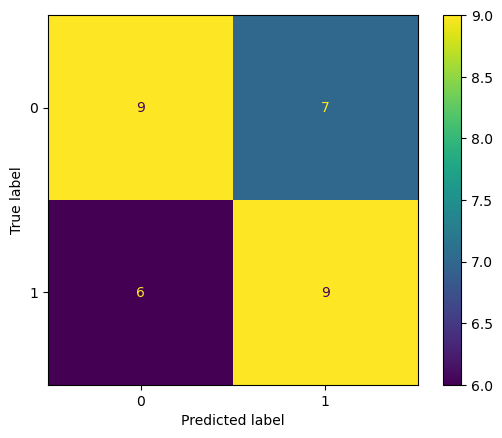

In [32]:
# create better display for confusion matrix
lie_cv_disp = ConfusionMatrixDisplay(Lie_CV_cnf_matrix)
lie_cv_disp.plot()

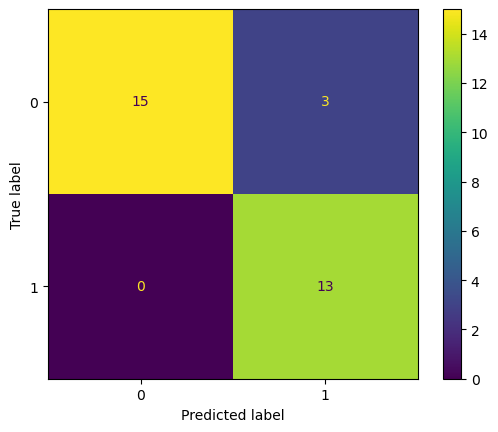

In [33]:
senti_cv_disp = ConfusionMatrixDisplay(Senti_CV_cnf_matrix)
senti_cv_disp.plot()

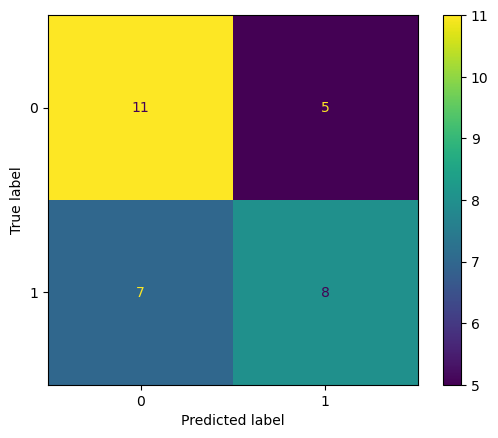

In [34]:
lie_tf_disp = ConfusionMatrixDisplay(Lie_TF_cnf_matrix)
lie_tf_disp.plot()

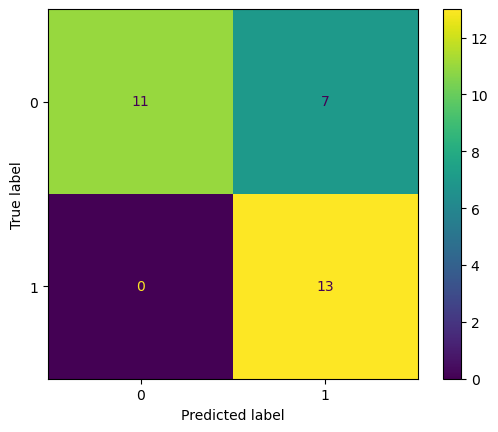

In [35]:
senti_tf_disp = ConfusionMatrixDisplay(Senti_TF_cnf_matrix)
senti_tf_disp.plot()
plt.show()

In [36]:
# calculate and print accuracy scores of each model iteration
print(accuracy_score(y_test_lie_cv,LiePrediction_CV))
print(accuracy_score(y_test_senti_cv,SentiPrediction_CV))
print(accuracy_score(y_test_lie_tf,LiePrediction_TF))
print(accuracy_score(y_test_senti_tf,SentiPrediction_TF))

0.5806451612903226
0.9032258064516129
0.6129032258064516
0.7741935483870968
